# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv', index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
house.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
# Drop variabel NaN
house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
house.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

In [15]:
# Memisahkan data menjadi numerikal & kategorikal
num_columns = house._get_numeric_data().columns
data_numeric = house[num_columns]
data_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
data_categorical = house.drop(num_columns, axis = 1)
data_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

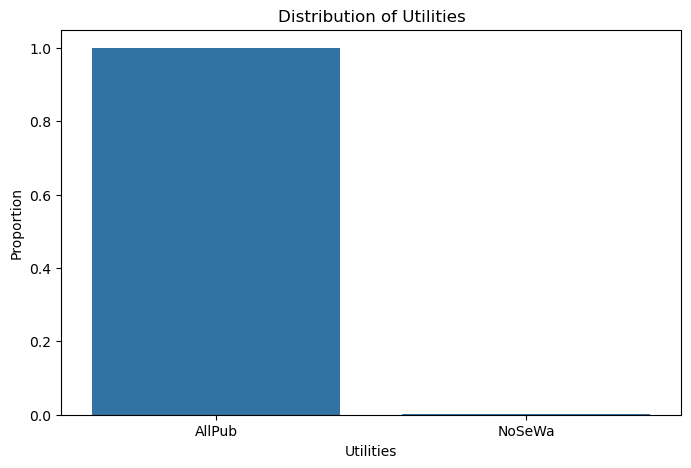

In [19]:
### Tulis kode Anda di sini
utilities_counts = data_categorical['Utilities'].value_counts(normalize=True).reset_index()
utilities_counts.columns = ['Utilities', 'Proportion']

plt.figure(figsize=(8, 5))
sns.barplot(x='Utilities', y='Proportion', data=utilities_counts)

plt.title('Distribution of Utilities')
plt.xlabel('Utilities')
plt.ylabel('Proportion')
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

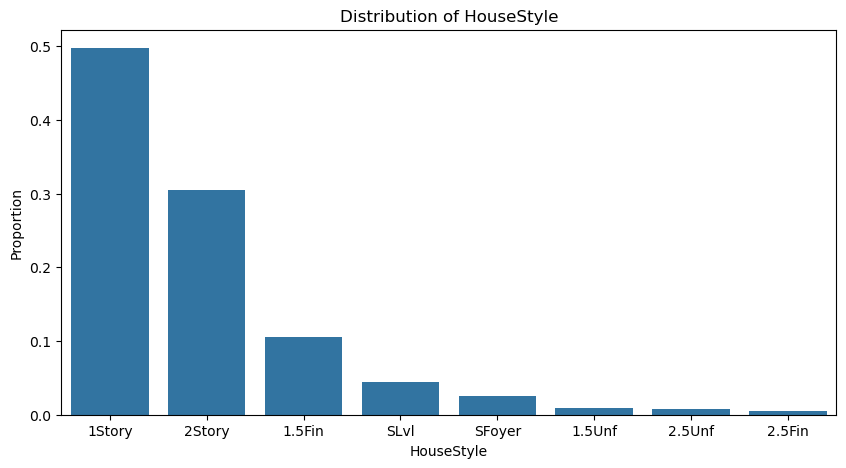

In [21]:
### Tulis kode Anda di sini
hs_counts = data_categorical['HouseStyle'].value_counts(normalize=True).reset_index()
hs_counts.columns = ['HouseStyle', 'Proportion']

plt.figure(figsize=(10, 5))
sns.barplot(x='HouseStyle', y='Proportion', data=hs_counts)

plt.title('Distribution of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Proportion')
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

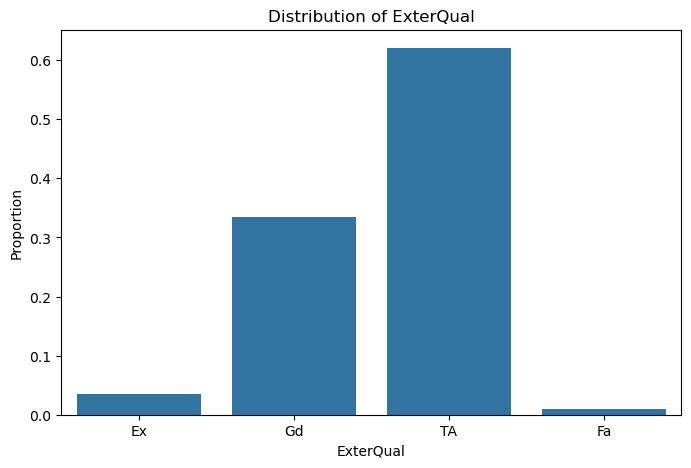

In [23]:
### Tulis kode Anda di sini
eq_counts = data_categorical['ExterQual'].value_counts(normalize=True).reset_index()
eq_counts.columns = ['ExterQual', 'Proportion']
category_order = ['Ex', 'Gd', 'TA', 'Fa']

plt.figure(figsize=(8, 5))
sns.barplot(x='ExterQual', y='Proportion',order=category_order,data=eq_counts)

plt.title('Distribution of ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Proportion')
plt.show()

#### **Analisis tentang variabel kategorikal**

1. Utilities  
Hampir semua rumah memiliki fasilitas "AllPub", sementara rumah dengan fasilitas "NoSeWa" sangat jarang. Karena distribusi tidak seimbang, variabel ini kurang informatif dan bisa dipertimbangkan untuk dihapus atau direduksi menjadi variabel biner.

2. HouseStyle  
Mayoritas rumah berjenis "1Story" dan "2Story", mencakup lebih dari 80% dataset. Gaya rumah lain seperti "1.5Unf", "2.5Fin", dan "2.5Unf" sangat jarang, menunjukkan bahwa rumah bertingkat sebagian atau split-level kurang umum.

3. ExterQual  
Sebagian besar rumah memiliki kualitas eksterior "TA" (Typical/Average) dan "Gd" (Good), sementara "Ex" (Excellent) dan "Fa" (Fair) sangat jarang. Ini menunjukkan bahwa kebanyakan rumah memiliki material eksterior standar, dengan sedikit yang sangat bagus atau buruk.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


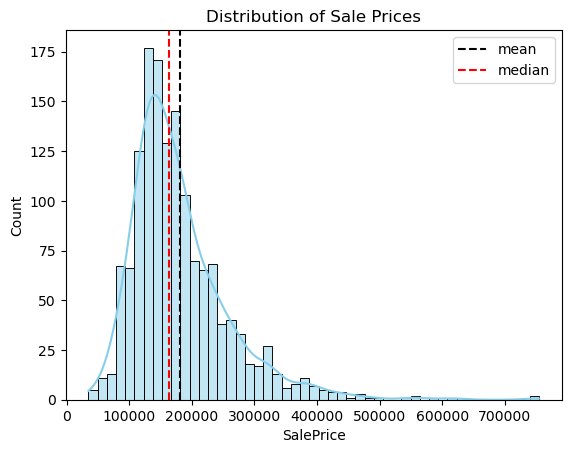

In [25]:
### Tulis kode Anda di sini
x = data_numeric["SalePrice"]
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribution of Sale Prices')
plt.xlabel(x.name) 
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**

Distribusi harga rumah right-skewed, dengan mean (180,921) lebih besar dari median (163,000), menunjukkan adanya outlier pada harga tinggi. Sebagian besar rumah berada di kisaran 100,000–200,000, dengan standar deviasi 79,442, yang menandakan variasi harga yang besar. Karena median lebih representatif, analisis lebih lanjut dapat mempertimbangkan transformasi data untuk menangani skewness.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


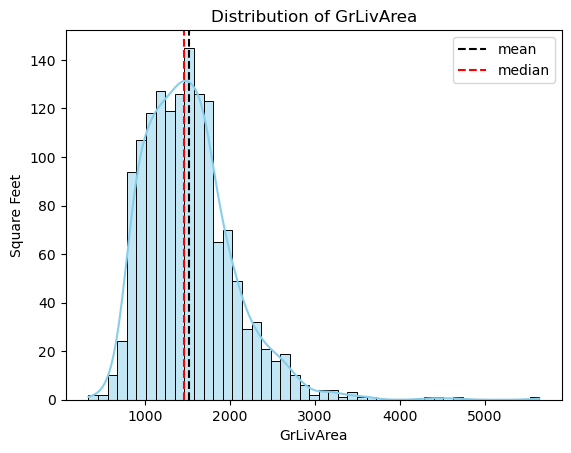

In [27]:
### Tulis kode Anda di sini
x = data_numeric["GrLivArea"]
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribution of GrLivArea')
plt.xlabel(x.name)
plt.ylabel('Square Feet')
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

Histogram GrLivArea menunjukkan distribusi luas area tinggal di atas tanah dalam satuan square feet. Distribusi yang right-skewed, terlihat dari nilai mean yang lebih besar dari median. Hal ini menunjukkan bahwa ada beberapa rumah dengan luas yang jauh lebih besar dari mayoritas, yang kemungkinan menjadi outlier. Sebagian besar rumah memiliki luas sekitar 1.000 - 2.000 square feet, yang terlihat dari puncak distribusi.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076
House with Garage: 1379
House with No Garage: 81


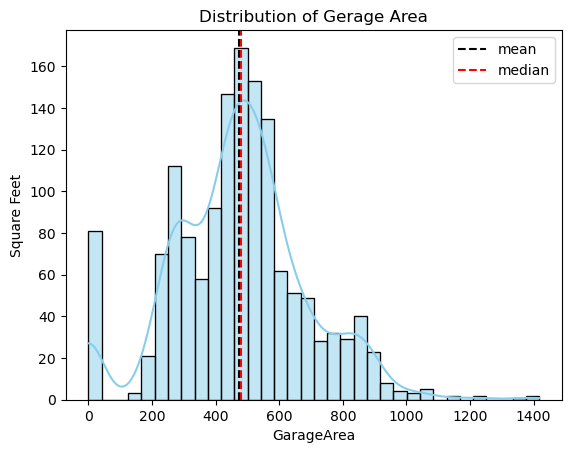

In [29]:
### Tulis kode Anda di sini
x = data_numeric["GarageArea"]
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribution of Gerage Area')
plt.xlabel(x.name)
plt.ylabel('Square Feet')
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
print('House with Garage:',np.sum(data_numeric['GarageArea'] != 0))
print('House with No Garage:',np.sum(data_numeric['GarageArea'] == 0))
plt.show()

#### **Analisis tentang variabel `GarageArea`**

Histogram GarageArea menunjukkan distribusi luas garasi dalam square feet. Distribusinya skewed to the right, terlihat dari mean yang lebih besar dari median walaupun nilainya hanya berbeda tipis tetapi memiliki long tail di kanan, ini menunjukkan adanya beberapa garasi berukuran sangat besar sebagai outlier. Sebagian besar rumah memiliki luas garasi sekitar 400 - 600 square fit, yang mencerminkan kapasitas umum untuk 1-2 mobil. Selain itu, terdapat 81 rumah yang tidak memiliki garasi dari total semua rumah yang ada di dalam dataset.

## Pemrosesan Data Variabel Numerikal

Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


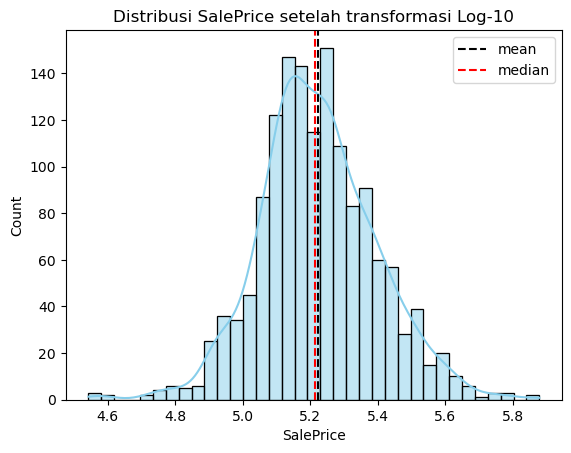

In [31]:
# Transformasi log-10 SalePrice

x = np.log10(data_numeric["SalePrice"])
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribusi SalePrice setelah transformasi Log-10')
plt.xlabel(x.name) 
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


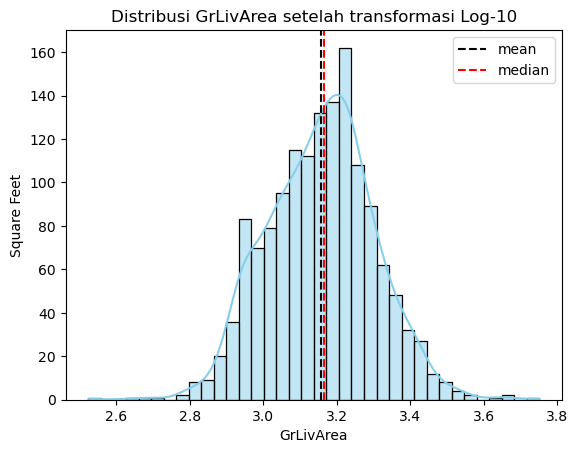

In [81]:
# Transformasi log-10 GrLivArea

x = np.log10(data_numeric["GrLivArea"])
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribusi GrLivArea setelah transformasi Log-10')
plt.xlabel(x.name)
plt.ylabel('Square Feet')
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


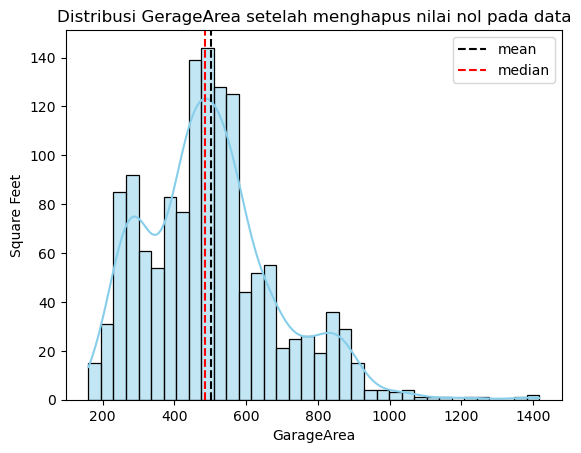

In [33]:
# Menghilangkan nilai nol pada GarageArea

x = data_numeric["GarageArea"][data_numeric["GarageArea"]!=0]
sns.histplot(x, kde=True, color="skyblue")
plt.title('Distribusi GerageArea setelah menghapus nilai nol pada data')
plt.xlabel(x.name)
plt.ylabel('Square Feet')
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

Setelah menerapkan transformasi log10 pada variabel SalePrice dan GrLivArea, serta menghapus nilai nol (rumah tanpa garasi) pada GarageArea, distribusi data menjadi lebih mendekati normal.

1. Pada SalePrice, nilai mean (5.22) dan median (5.21) hampir berimpit, menunjukkan distribusi yang lebih simetris dibandingkan sebelum transformasi. Standar deviasi yang lebih kecil (0.17) juga mengindikasikan bahwa variasi data lebih terkendali.

2. Serupa dengan SalePrice, distribusi GrLivArea setelah transformasi log10 juga lebih simetris dengan perbedaan kecil antara mean (3.16) dan median (3.17). Hal ini menunjukkan bahwa transformasi berhasil mengurangi skewness dan membuat data lebih normal.

3. Untuk GarageArea, setelah menghapus nilai nol, distribusi tetap sedikit skewed ke kanan, dengan mean (500.76) lebih besar dari median (484). Namun, dibandingkan sebelumnya, distribusi lebih terpusat dan memiliki variasi yang lebih terkendali (standar deviasi 185.69).

Secara keseluruhan, transformasi log10 efektif dalam menangani skewness pada SalePrice dan GrLivArea, sedangkan untuk GarageArea, langkah tambahan seperti transformasi atau penanganan outlier mungkin diperlukan agar distribusinya lebih normal.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

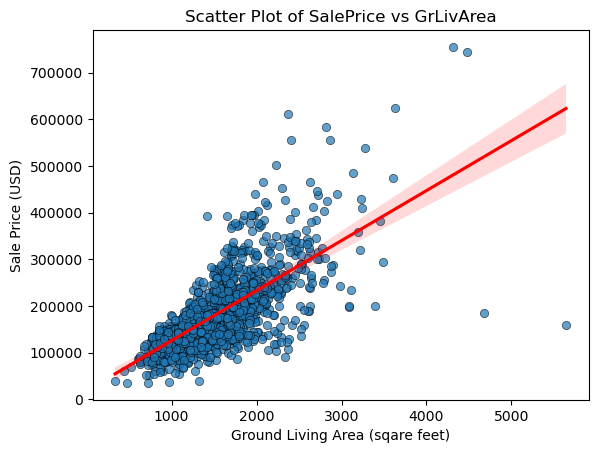

In [35]:
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=data_numeric, alpha=0.7, edgecolor="k")
sns.regplot(x="GrLivArea", y="SalePrice", data=data_numeric, scatter=False, color="red")
plt.title("Scatter Plot of SalePrice vs GrLivArea")
plt.xlabel("Ground Living Area (sqare feet)")
plt.ylabel("Sale Price (USD)")
plt.show()

# `GarageArea` dengan `SalePrice`

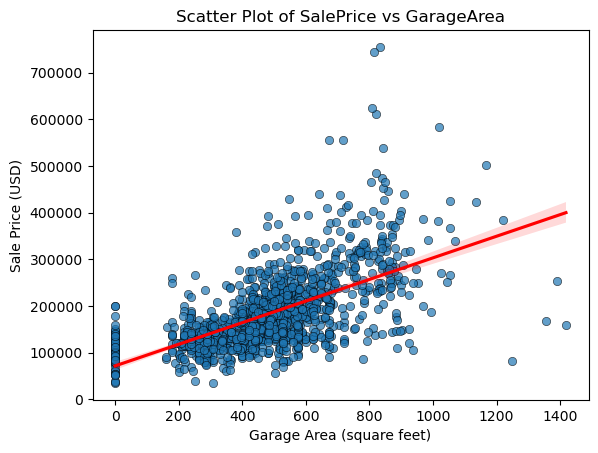

In [37]:
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=data_numeric, alpha=0.7, edgecolor="k")
sns.regplot(x="GarageArea", y="SalePrice", data=data_numeric, scatter=False, color="red")
plt.title("Scatter Plot of SalePrice vs GarageArea")
plt.xlabel("Garage Area (square feet)")
plt.ylabel("Sale Price (USD)")
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

Analisis scatter plot GrLivArea vs SalePrice dan GarageArea vs SalePrice menunjukkan adanya korelasi positif antara kedua variabel dengan harga jual rumah. Pada scatter plot GrLivArea vs SalePrice, hubungan antara luas area lantai utama dan harga rumah terlihat cukup kuat, dengan titik-titik data yang mengikuti pola linear dan garis regresi yang menunjukkan tren kenaikan harga seiring bertambahnya luas bangunan. Namun, terdapat beberapa outlier, seperti rumah dengan luas lantai sangat besar tetapi memiliki harga jual yang lebih rendah dari tren umum.

Sementara itu, scatter plot GarageArea vs SalePrice juga menunjukkan korelasi positif, meskipun hubungan ini terlihat lebih lemah dibandingkan dengan GrLivArea. Titik-titik data lebih tersebar, menunjukkan bahwa luas garasi memiliki pengaruh terhadap harga rumah, tetapi tidak sekuat luas area lantai utama. Beberapa outlier juga ditemukan, seperti rumah dengan garasi luas tetapi harga jualnya tidak terlalu tinggi, yang mengindikasikan bahwa faktor lain juga berperan dalam menentukan harga rumah.

Secara keseluruhan, luas area lantai utama (GrLivArea) tampaknya memiliki dampak lebih signifikan terhadap harga rumah dibandingkan dengan luas garasi (GarageArea). Hal ini dapat dimengerti karena ruang utama rumah merupakan faktor utama dalam menentukan kenyamanan dan nilai properti, sedangkan garasi, meskipun penting, bukanlah faktor utama dalam penentuan harga jual rumah.